# Import

In [1]:
from folktables import *
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import schedulefree
import numpy as np
import matplotlib.pyplot as plt
import math

# Download

In [3]:
data_source = ACSDataSource(survey_year='2023', horizon='1-Year', survey='person', root_dir='../Data')

the following code was used to download everything in one go, but our memory does not allow us to have it all in memory as it has to many columns & individuals

In [4]:
#acs_data = data_source.get_data(download=False)

'AR'download not working for 2018 but seems fine for 2023

# Different datasets (variable selection & objective)

In [5]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR']

## Income (INC)

In [5]:
all_features, all_labels, all_groups = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for number, state in enumerate(states):
    acs_data = data_source.get_data(states = [state], download=False)
    ACSIncomeNew = BasicProblem(
    features=[
        'COW',
        'SCHL',
        'MAR',
        'OCCP',
        'POBP',
        'WKHP',
        'RAC1P',
    ],
    target='PINCP',
    group='SEX',
    preprocess=adult_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),)
    features, label, group = ACSIncomeNew.df_to_pandas(acs_data)
    features['State'] = number
    all_features = pd.concat([all_features, features])
    all_labels = pd.concat([all_labels, label])
    all_groups = pd.concat([all_groups, group])

In [6]:
df_all = pd.concat([all_features, all_labels, all_groups], axis = 1).reset_index(drop = True)
df_all.to_csv('../Data/ASCIncome_2023.csv', index = False)

## Public Coverage (PUC)

In [ ]:
all_features, all_labels, all_groups = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for number, state in enumerate(states):
    acs_data = data_source.get_data(states = [state], download=False)
    ACSPublicCoverage = folktables.BasicProblem(
    features=[
        'AGEP',
        'SCHL',
        'MAR',
        'SEX',
        'ESP',
        'CIT',
        'MIG',
        'MIL',
        'ANC',
        'NATIVITY',
        'DEAR',
        'DEYE',
        'DREM',
        'PINCP',
        'ESR',
        'FER',
        'RAC1P',
    ],
    target='PUBCOV',
    target_transform=lambda x: x == 1,
    group='DIS',
    preprocess=public_coverage_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),
)
    features, label, group = ACSPublicCoverage.df_to_pandas(acs_data)
    features['State'] = number
    all_features = pd.concat([all_features, features])
    all_labels   = pd.concat([all_labels, label])
    all_groups   = pd.concat([all_groups, group])

In [10]:
df_all = pd.concat([all_features, all_labels, all_groups], axis = 1).reset_index(drop = True)
df_all.to_csv('../Data/ACSPublicCoverage_2023.csv', index = False)

## Travel Time (TRA)

In [81]:
all_features, all_labels, all_groups = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for number, state in enumerate(states):
    acs_data = data_source.get_data(states = [state], download=False)
    ACSTravelTime = folktables.BasicProblem(
    features=[
        'AGEP',
        'SCHL',
        'MAR',
        'DIS',
        'ESP',
        'MIG',
        'RAC1P',
        'PUMA',
        'CIT',
        'OCCP',
        'POWPUMA',
        'POVPIP',
    ],
    target="JWMNP",
    group='SEX',
    preprocess=travel_time_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),
)
    features, label, group = ACSTravelTime.df_to_pandas(acs_data)
    features['State'] = number
    all_features = pd.concat([all_features, features])
    all_labels = pd.concat([all_labels, label])
    all_groups = pd.concat([all_groups, group])

In [82]:
df_all = pd.concat([all_features, all_labels, all_groups], axis = 1).reset_index(drop = True)
col_name, value = 'SEX'  , 1
print(df_all[df_all[col_name] == value].JWMNP.mean(), df_all[df_all[col_name] != value].JWMNP.mean())
col_name, value = 'RAC1P'  , 1
print(df_all[df_all[col_name] == value].JWMNP.mean(), df_all[df_all[col_name] != value].JWMNP.mean())
df_all.to_csv('../Data/ACSTravelTime_2023.csv', index = False)

29.62347737393765 26.042386065499525
26.889517363409137 29.959039799709544


## Mobility (MOB)

In [6]:
all_features, all_labels, all_groups = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for number, state in enumerate(states):
    acs_data = data_source.get_data(states = [state], download=False)
    ACSMobility = folktables.BasicProblem(
    features=[
        'AGEP',
        'SCHL',
        'MAR',
        'DIS',
        'CIT',
        'MIL',
        'ANC',
        'NATIVITY',
        'DEAR',
        'DEYE',
        'DREM',
        'RAC1P',
        'GCL',
        'COW',
        'ESR',
        'WKHP',
        'JWMNP',
        'PINCP',
    ],
    target="MIG",
    target_transform=lambda x: x == 1,
    group='SEX',
    preprocess=lambda x: x.drop(x.loc[(x['AGEP'] <= 18)].index),
    postprocess=lambda x: np.nan_to_num(x, -1),
)
    features, label, group = ACSMobility.df_to_pandas(acs_data)
    features['State'] = number
    all_features = pd.concat([all_features, features])
    all_labels = pd.concat([all_labels, label])
    all_groups = pd.concat([all_groups, group])

In [9]:
df_all = pd.concat([all_features, all_labels, all_groups], axis = 1).reset_index(drop = True)
col_name, value = 'SEX'  , 1
print(df_all[df_all[col_name] == value].MIG.mean() / df_all[df_all[col_name] != value].MIG.mean())
col_name, value = 'DIS'  , 1
print(df_all[df_all[col_name] == value].MIG.mean() / df_all[df_all[col_name] != value].MIG.mean())
col_name, value = 'RAC1P'  , 1
print(df_all[df_all[col_name] == value].MIG.mean() / df_all[df_all[col_name] != value].MIG.mean())
col_name, value = 'ESR'  , 3
print(df_all[df_all[col_name] != value].MIG.mean() / df_all[df_all[col_name] == value].MIG.mean())
col_name, value = 'AGEP'  , 45
print(df_all[df_all[col_name] <= value].MIG.mean() / df_all[df_all[col_name] > value].MIG.mean())

0.9884860671770984
0.9984058613986356
1.0337734490725854
1.0903239463260377
0.8727521137418879


In [10]:
col_name = 'AGEP'
for value in np.arange(20, 80, 5):
    print(value, df_all[df_all[col_name] <= value].MIG.mean() / df_all[df_all[col_name] > value].MIG.mean())

20 0.7983894503632059
25 0.8052649512045502
30 0.8157282756063143
35 0.8362925633340669
40 0.8558562017920844
45 0.8727521137418879
50 0.8862240389122523
55 0.8984202846182348
60 0.9096969685551485
65 0.9199061450046437
70 0.931371423318388
75 0.9448937260229253


In [11]:
df_all.to_csv('../Data/ACSMobility_2023.csv', index = False)

## Employment (EMP)

In [ ]:
all_features, all_labels, all_groups = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for number, state in enumerate(states):
    acs_data = data_source.get_data(states = [state], download=False)
    ACSEmploymentFiltered = folktables.BasicProblem(
    features=[
        'AGEP',
        'SCHL',
        'MAR',
        'SEX',
        'ESP',
        'MIG',
        'CIT',
        'MIL',
        'ANC',
        'NATIVITY',
        'DEAR',
        'DEYE',
        'DREM',
        'RAC1P',
        'GCL',
    ],
    target="ESR",
    target_transform=lambda x: x == 1,
    group='DIS',
    preprocess=employment_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),
)
    features, label, group = ACSEmploymentFiltered.df_to_pandas(acs_data)
    features['State'] = number
    all_features = pd.concat([all_features, features])
    all_labels = pd.concat([all_labels, label])
    all_groups = pd.concat([all_groups, group])

In [14]:
df_all = pd.concat([all_features, all_labels, all_groups], axis = 1).reset_index(drop = True)
col_name, value = 'SEX'  , 1
print(df_all[df_all[col_name] == value].ESR.mean(), df_all[df_all[col_name] != value].ESR.mean())
col_name, value = 'DIS'  , 1
print(df_all[df_all[col_name] == value].ESR.mean(), df_all[df_all[col_name] != value].ESR.mean())
col_name, value = 'RAC1P'  , 1
print(df_all[df_all[col_name] == value].ESR.mean(), df_all[df_all[col_name] != value].ESR.mean())
df_all.to_csv('../Data/ACSEmploymentFiltered_2023.csv', index = False)

0.5905168012752001 0.5226723514291431
0.23394462104464847 0.625294731030564
0.5473502476788681 0.573584804523176


# Overview

In [7]:
df_all = pd.read_csv('../Data/ASCIncome_2023.csv')
df_all.head()

,COW,SCHL,MAR,OCCP,POBP,WKHP,RAC1P,State,PINCP,SEX
0,1.0,18.0,5.0,7810.0,17.0,28.0,1.0,0,2500.0,1
1,3.0,19.0,5.0,4600.0,1.0,30.0,1.0,0,500.0,1
2,4.0,19.0,5.0,5240.0,1.0,10.0,1.0,0,3700.0,2
3,1.0,16.0,5.0,9610.0,5.0,10.0,1.0,0,2000.0,1
4,1.0,16.0,5.0,4720.0,12.0,30.0,2.0,0,8300.0,1


## Network preparation

In [8]:
class Network(nn.Module):
    def __init__(self, init_column, activation_bool = False):
        super().__init__()
        self.activation_bool = activation_bool
        self.seq = nn.Sequential()
        self.seq.append(nn.BatchNorm1d(init_column))
        self.seq.append(nn.Linear(init_column, 256))
        self.seq.append(nn.ReLU())

        for i in range(4):
            self.seq.append(nn.BatchNorm1d(256))
            self.seq.append(nn.Linear(256, 256))
            self.seq.append(nn.ReLU())
        
        self.seq.append(nn.BatchNorm1d(256))
        self.seq.append(nn.Linear(256, 1))
        self.activation = nn.Sigmoid()

    def forward(self, x):
        prob = self.seq(x)
        if self.activation_bool:
            return self.activation(prob)
        return prob

In [9]:
test_percentage = 0.2
X = df_all.iloc[:,:7].values
X_cr = (X - X.mean(axis = 0)) / X.std(axis = 0)
Y = df_all.PINCP.values
S = df_all.SEX.values

test_size = int(len(X) * test_percentage)
train_size = len(X) - test_size
train_size

indexs = np.arange(len(X))
np.random.shuffle(indexs)
X_cr_train, Y_train, S_train = X_cr[indexs[:train_size]], Y[indexs[:train_size]], S[indexs[:train_size]]
X_cr_test, Y_test, S_test    = X_cr[indexs[train_size:]], Y[indexs[train_size:]], S[indexs[train_size:]]

X_train, X_test, Y_train, Y_test = torch.from_numpy(X_cr_train), torch.from_numpy(X_cr_test), torch.from_numpy(Y_train), torch.from_numpy(Y_test)

In [10]:
epochs = 3
batch_size = 2048

In [11]:
def training_network_threshold(model,
                     optimizer,
                     threshold  = 50000,
                     X_train    = X_train,
                     Y_train    = Y_train,
                     X_test     = X_test,
                     Y_test     = Y_test,
                     epochs     = epochs,
                     batch_size = batch_size,
                     ):
    list_loss_train, list_acc_train = np.zeros((epochs, math.ceil(len(X_train)//batch_size))), np.zeros((epochs, math.ceil(len(X_train)//batch_size)))
    list_loss_test,  list_acc_test  = np.zeros((epochs, math.ceil(len(X_test)//batch_size))),  np.zeros((epochs, math.ceil(len(X_test)//batch_size)))
    for epoch in range(1,epochs+1):
        #Train
        model.train()
        optimizer.train()


        for batch_count in range(math.ceil(len(X_train)//batch_size)):
            optimizer.zero_grad()
            x,y = X_train[(batch_count*batch_size):((batch_count+1)*batch_size)].float(), (Y_train[(batch_count*batch_size):((batch_count+1)*batch_size)] > threshold).float()
            output = model(x)
            batch_loss = ((y - output.squeeze())**2).mean() #loss(y, output.squeeze())
            batch_loss.backward()
            optimizer.step()

            acc = (1.*(y == (1.*(output.squeeze() > 0.5)))).mean()

            list_loss_train[epoch-1, batch_count] = batch_loss.item()
            list_acc_train[epoch-1, batch_count]  =  acc.item()

        with torch.no_grad():
            optimizer.eval()
            for batch_count in range(5):
                x = X_train[(batch_count*batch_size):((batch_count+1)*batch_size)].float()
                output = model(x)
        model.eval()

        #Test
        for batch_count in range(math.ceil(len(X_test)//batch_size)):
            x,y = X_test[(batch_count*batch_size):((batch_count+1)*batch_size)].float(), (Y_test[(batch_count*batch_size):((batch_count+1)*batch_size)] > threshold).float()
            output = model(x.float())
            batch_loss =  ((y - output.squeeze())**2).mean() #loss(y, output.squeeze())
            acc = (1.*(y == (1.*(output.squeeze() > 0.5)))).mean()

            list_loss_test[epoch-1, batch_count] = batch_loss.item()
            list_acc_test[epoch-1, batch_count]  = acc.item()
    return

In [12]:
list_true_DI, list_pred_DI, list_true_disparate_treatement, list_pred_disparate_treatement, list_true_P1, list_pred_P1, list_acc = [], [], [], [], [], [], []
thresholds = np.arange(1000, 200000, 10000)
for threshold in thresholds:
    model = Network(X_train.shape[1], activation_bool = True)
    optimizer = schedulefree.AdamWScheduleFree(model.parameters(), lr=0.001) #torch.optim.AdamW(model.parameters(), lr = 0.001)

    label = (Y_test > threshold)*1.
    group = S_test

    training_network_threshold(model, optimizer, threshold = threshold)
    pred = (model(X_test.float()).squeeze() > 0.5)*1.
    acc = ( (pred == label)*1.).mean().item()

    

    list_true_P1.append(label.mean().item())
    list_pred_P1.append(pred.mean().item())

    list_true_DI.append(label[group==2].mean().item() / label[group==1].mean().item())
    list_pred_DI.append(pred[group==2].mean().item() / pred[group==1].mean().item())

    list_true_disparate_treatement.append(abs(label[group==2].mean().item() - label[group==1].mean().item()))
    list_pred_disparate_treatement.append(abs(pred[group==2].mean().item() - pred[group==1].mean().item()))

    list_acc.append(acc)


## Visual result

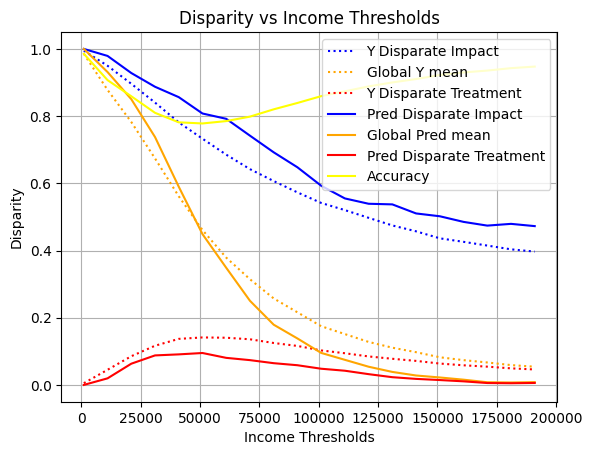

In [15]:
plt.plot(thresholds, list_true_DI, label = 'Y Disparate Impact', color = 'blue', linestyle = 'dotted')
plt.plot(thresholds, list_true_P1, label = 'Global Y mean', color = 'orange', linestyle = 'dotted')
plt.plot(thresholds, list_true_disparate_treatement, label = 'Y Disparate Treatment', color = 'red', linestyle = 'dotted')
plt.plot(thresholds, list_pred_DI, label = 'Pred Disparate Impact', color = 'blue')
plt.plot(thresholds, list_pred_P1, label = 'Global Pred mean', color = 'orange')
plt.plot(thresholds, list_pred_disparate_treatement, label = 'Pred Disparate Treatment', color = 'red')
plt.plot(thresholds, list_acc, label = 'Accuracy', color = 'yellow')
plt.xlabel('Income Thresholds')
plt.ylabel('Disparity')
plt.title('Disparity vs Income Thresholds')
plt.legend()    
plt.grid()
plt.show()